# Preprocessing Notebook

This notebook serves to illustrate some exploratory data analysis on the train dataset, following by preprocessing to prepare the data.

## We will import the necessary libraries and load the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print("Pandas" + pd.__version__)
print("Numpy" + np.__version__)
print("Seaborn" + sns.__version__)

Pandas2.1.1
Numpy1.26.1
Seaborn0.13.0


In [47]:
# load raw dataset
# Load a dataset into a Pandas Dataframe
train_df = pd.read_csv('../data/train.csv')
print("Full train dataset shape is {}".format(train_df.shape))

Full train dataset shape is (8693, 14)


In [48]:
# Display the first 5 examples
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## EDA

Let us quickly do a basic exploration of the dataset

In [49]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Bar chart for label column: Transported

<Axes: xlabel='Transported'>

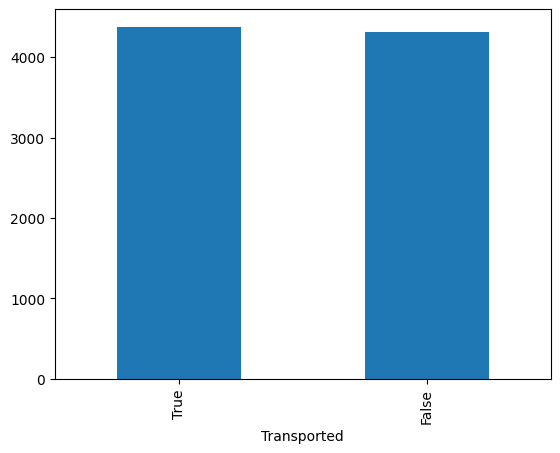

In [7]:
train_df.Transported.value_counts().plot(kind="bar")

There does not appear to be a class imbalance problem for the predicted labels.

### Numerical data distribution

Let us plot all the numerical columns and their value counts:

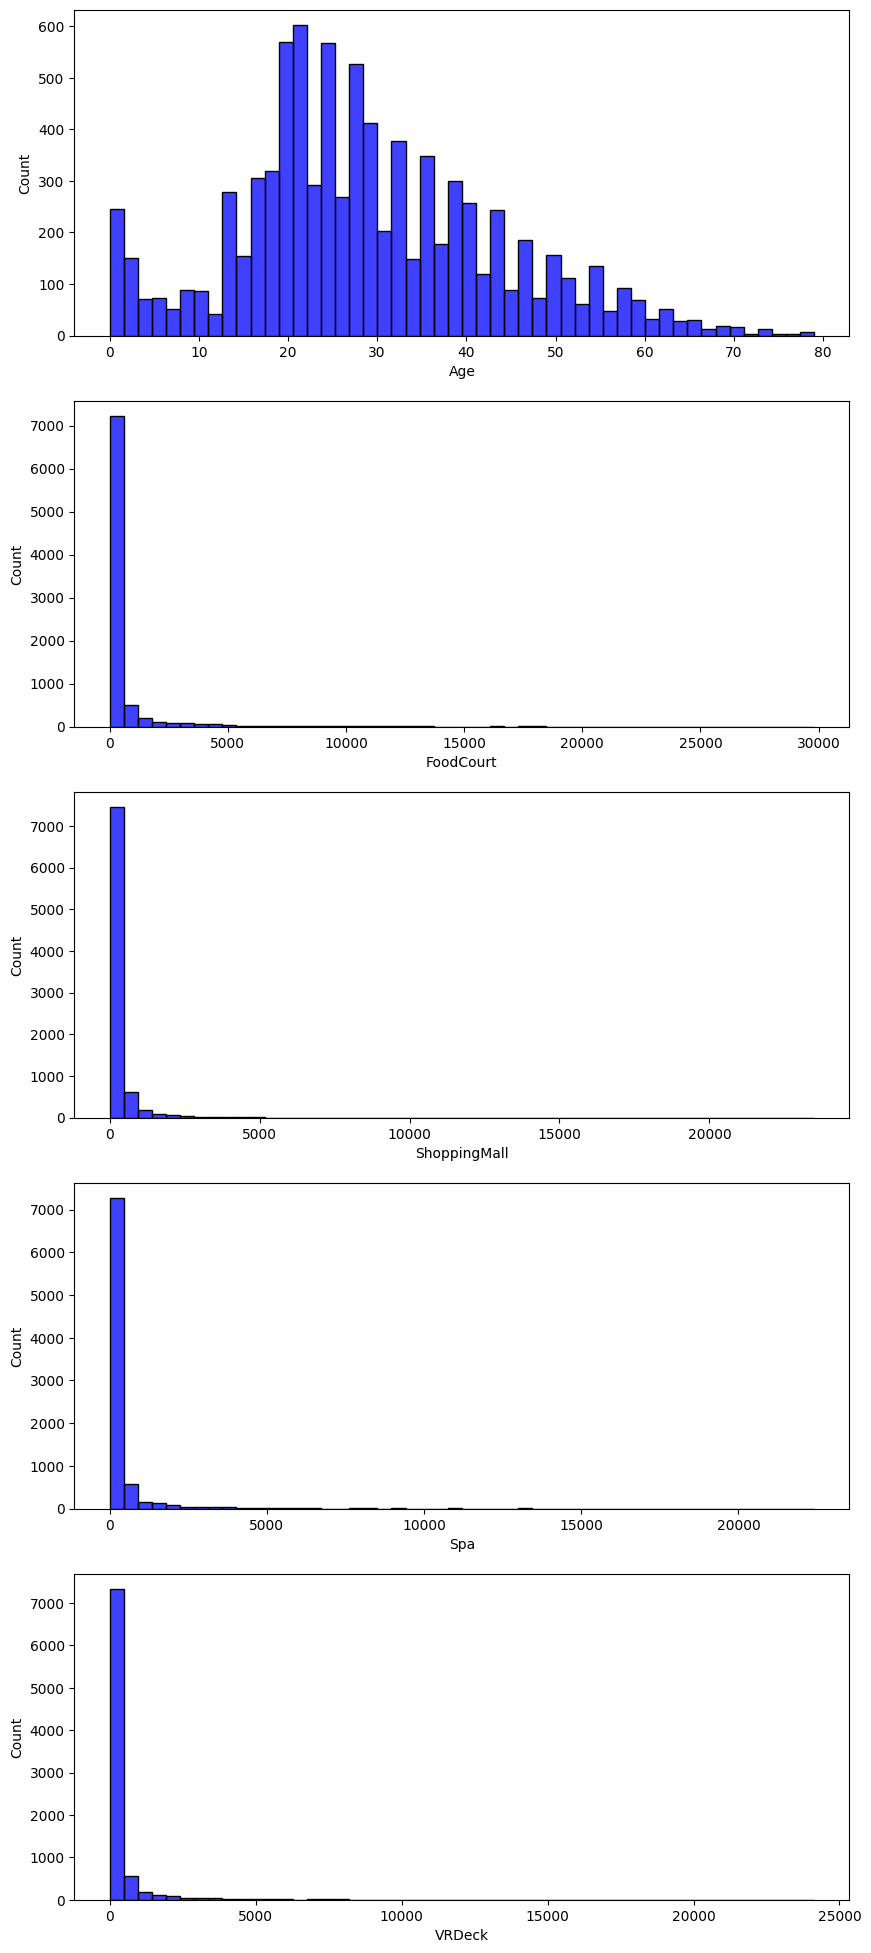

In [8]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(train_df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(train_df['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(train_df['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(train_df['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(train_df['VRDeck'], color='b', bins=50, ax=ax[4]);

# Prepare the dataset

We will drop `Name` column as they are not necessary for model training.

In [9]:
train_df = train_df.drop(['Name'], axis=1)
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [10]:
train_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

This dataset contains a mix of numeric, categorical and missing features. Boolean fields have missing values too. So we need to convert those fields into int. To account for the missing values in the boolean fields, we will replace them with zero.

In [11]:
num_feats = ['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_feats = ['HomePlanet','Cabin','Destination','RoomService','Age']

In [12]:
# filling missing values for numeric features
train_df[num_feats] = train_df[num_feats].fillna(value=0)
train_df.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Cabin           199
Destination     182
RoomService     181
Age             179
PassengerId       0
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [13]:
def convert_bool_to_int (df:pd.DataFrame, col_lst:list)->pd.DataFrame:
    """
    Simple utility function to convert column from boolean values to integer format. Some ML models are not able to accept boolean values.
    
    Args:
        df [pandas dataframe]: dataframe in pandas format
        col_lst [list]: list of column names in boolean format to be converted to int 
        
    Return:
        df [pandas dataframe]: dataframe in pandas format with boolean columns converted to int
    """
    
#     run tests to verify if there are null values in the boolean columns since columns with null values cannot be converted to int
    target_df = df[col_lst] # create new dataframe with only boolean columns
    test_result = any(num > 0 for num in list(target_df.isnull().sum())) # check if column have null values
    
    # convert boolean to int if there are no null values
    if test_result == False: 
        for col in col_lst:
            df[col] = df[col].astype(int)
        
    else:
        print("There are null values in the columns. Dataframe remains unchanged")
        
    return df

In [14]:
col_lst = ["Transported","VIP","CryoSleep"]

train_df = convert_bool_to_int(train_df, col_lst)

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


The value of column `Cabin` is a string with the format `Deck/Cabin_num/Side`. Here we will split the `Cabin` column and create 3 new columns `Deck`, `Cabin_num` and `Side`, since it will be easier to train the model on those individual data.

Run the following command to split the column `Cabin` into columns `Deck`, `Cabin_num` and `Side`

In [15]:
train_df["Cabin"].str.split("/", expand=True)

train_df[["Deck", "Cabin_num", "Side"]] = train_df["Cabin"].str.split("/", expand=True)

Remove original `Cabin` column from the dataset since it's not needed anymore.

In [16]:
try:
    train_df = train_df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

In [17]:
train_df.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Deck            199
Cabin_num       199
Side            199
Destination     182
RoomService     181
Age             179
PassengerId       0
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

## Categorical Features

### Age - Bin `age` into `age groups`

In [18]:
# fill age with mean
train_df['Age'] = train_df['Age'].fillna(value=train_df['Age'].mean())

# create age group from age
train_df['AgeGroup'] = train_df['Age'].apply(lambda x: int(str(x)[0]) if x > 10 else 0) 

# drop age
train_df = train_df.drop(['Age'],axis=1)

In [19]:
train_df.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Deck            199
Cabin_num       199
Side            199
Destination     182
RoomService     181
PassengerId       0
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
AgeGroup          0
dtype: int64

We will impute missing values for categorical features with mode

In [20]:
cat_feats = ['HomePlanet','Cabin_num','Destination','RoomService','Deck','Side']
train_df[cat_feats] = train_df[cat_feats].fillna(value=train_df.mode().iloc[0])

### Categorical data distribution

Let us plot all the categorical columns and their value counts:

In [46]:
train_df['RoomService'].value_counts().sort_values(ascending=False)

RoomService
0.0       4554
1.0         99
2.0         67
3.0         47
4.0         40
          ... 
425.0        1
1603.0       1
199.0        1
630.0        1
240.0        1
Name: count, Length: 1106, dtype: int64

In [42]:
max(train_df['RoomService'])

14327.0

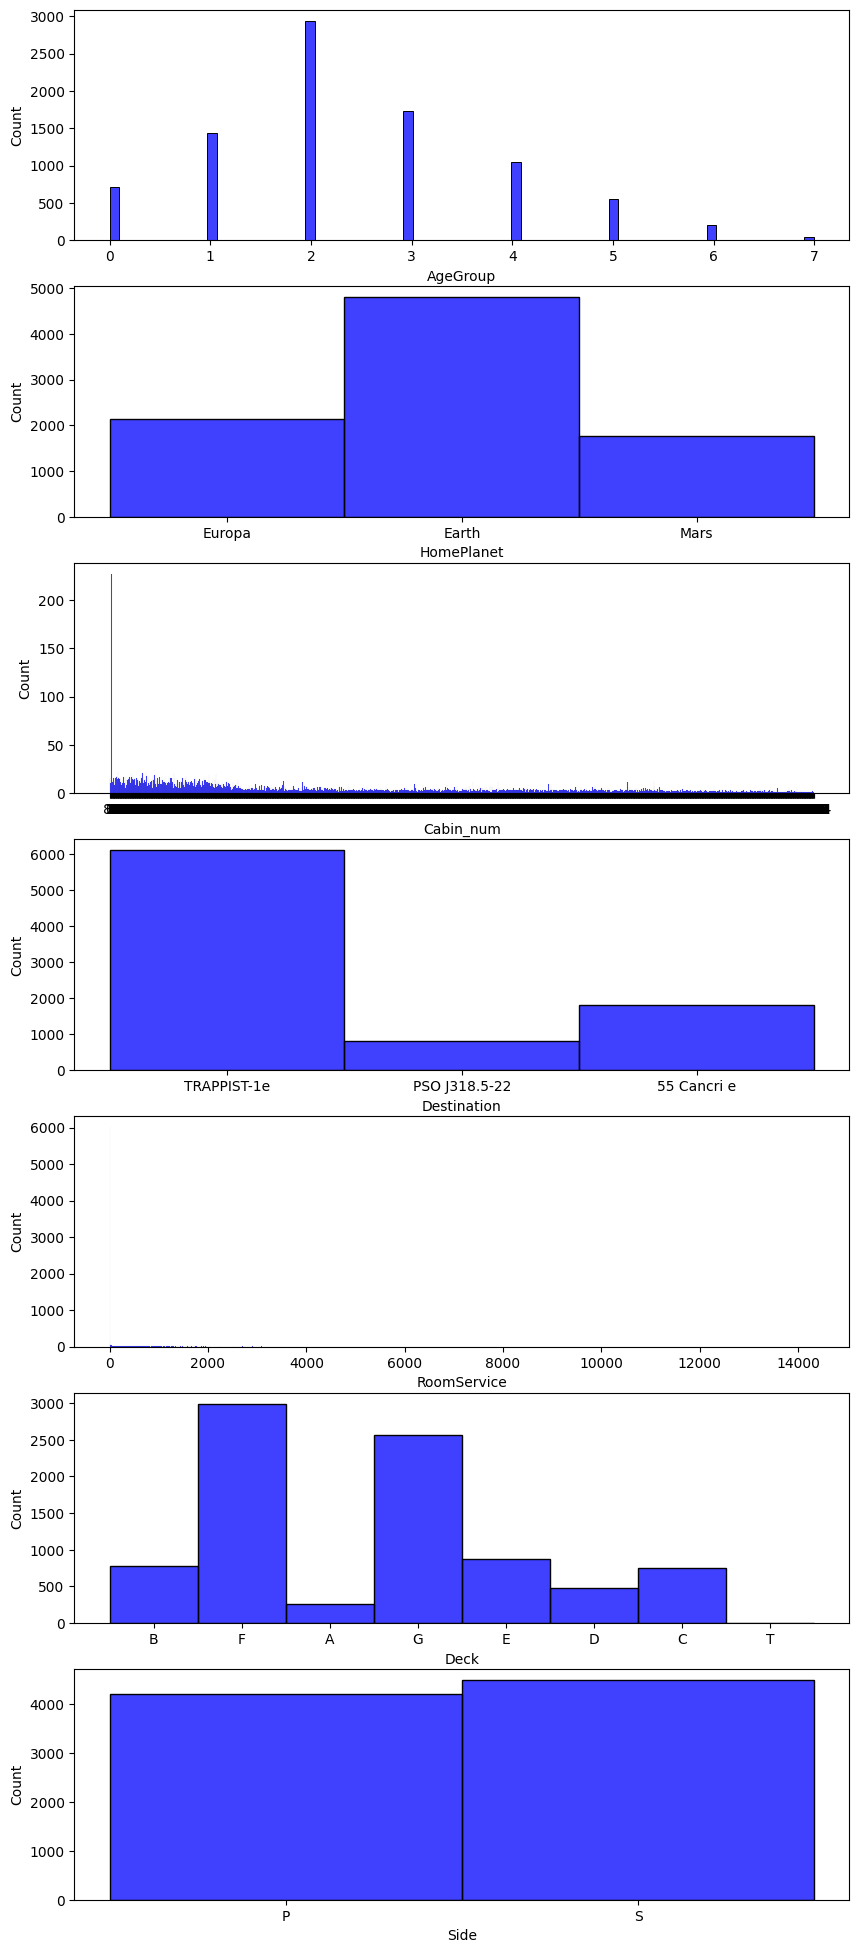

In [21]:
fig, ax = plt.subplots(7,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(train_df['AgeGroup'], color='b', ax=ax[0]);
sns.histplot(train_df['HomePlanet'], color='b', ax=ax[1]);
sns.histplot(train_df['Cabin_num'], color='b', ax=ax[2]);
sns.histplot(train_df['Destination'], color='b', ax=ax[3]);
sns.histplot(train_df['RoomService'], color='b', ax=ax[4]);
sns.histplot(train_df['Deck'], color='b', ax=ax[5]);
sns.histplot(train_df['Side'], color='b', ax=ax[6]);

In [22]:
train_df.isnull().sum().sort_values(ascending=False)

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Cabin_num       0
Side            0
AgeGroup        0
dtype: int64

All features have been imputed with values. Our data has been successfully preprocessed.

# Export preprocessed data

In [23]:
import os
import datetime

In [24]:
# get current datetime and date
current_time = datetime.datetime.now()
current_time = '_'.join(str(current_time).split(' '))
current_date = datetime.date.today()
current_date = ''.join(str(current_date).split('-'))

In [25]:
output_path = f"../data/{current_date}/"
os.makedirs(output_path, exist_ok=True) 
train_df.to_csv(os.path.join(output_path,f"train_{current_time}.csv"),index=False)

## Preprocess test dataset

We will consolidate the preprocessing codes into a single function to perform the set set of preprocessing on the test dataset

In [26]:
def preprocessing (df):
    """
    Requires the function - convert_bool_to_int 

    Args:
        df [pandas dataframe]: pandas dataframe

    Returns:
        df [pandas dataframe]: pandas dataframe

    """

    # declare numerical and categorical features
    num_feats = ['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    cat_feats = ['HomePlanet','Cabin','Destination','RoomService','Age']

    # filling missing values for numeric features
    df[num_feats] = df[num_feats].fillna(value=0)

    # convert boolean to list
    col_lst = ["VIP","CryoSleep"]

    # this line uses a separate function declared outside of this function
    df = convert_bool_to_int(df, col_lst)

    ## feature engineering
    # split cabin columns
    df["Cabin"].str.split("/", expand=True)

    df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)

    # fill age with mean
    df['Age'] = df['Age'].fillna(value=df['Age'].mean())

    # create age group from age
    df['AgeGroup'] = df['Age'].apply(lambda x: int(str(x)[0]) if x > 10 else 0) 

    # new categorical features based on feature engineering
    cat_feats = ['HomePlanet','Cabin_num','Destination','RoomService','Deck','Side']

    # impute missing values with mode
    df[cat_feats] = df[cat_feats].fillna(value=df.mode().iloc[0])

    # drop unnecessary columns
    try:
        df = df.drop(['Cabin','Age','Name'], axis=1)
    except KeyError:
        print("Field does not exist")

    return df

In [27]:
# Load a dataset into a Pandas Dataframe
test_df = pd.read_csv('../data/test.csv')
print("Full test dataset shape is {}".format(test_df.shape))

Full test dataset shape is (4277, 13)


In [28]:
test_df = preprocessing(test_df)

In [29]:
test_df.to_csv(os.path.join(output_path,f"test_{current_time}.csv"),index=False)

# Tensorflow Decision Trees

We will now use Random Forest and Gradient Boosted Trees from TensorFlow  

In [30]:
import tensorflow_decision_forests as tfdf
import dtreeviz

from IPython import display

display.set_matplotlib_formats('retina') # generate hires plots

np.random.seed(1234)  # reproducible plots/data for explanatory reasons


/var/folders/g4/mj9t8ccd7bn74b0c25x8xjth0000gn/T/ipykernel_90522/1598430477.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


In [31]:
# Let's check the versions:
tfdf.__version__, dtreeviz.__version__  # want dtreeviz >= 2.2.0

('1.6.0', '2.2.2')

In [32]:
# define label
label = 'Transported'

classes = list(train_df[label].unique())

print(f"Target '{label}'' classes: {classes}")

Target 'Transported'' classes: [0, 1]


In [33]:
def split_dataset(df, test_ratio=0.20, seed=1234):
  """
  Splits a panda dataframe in two, usually for train/test sets.
  Using the same random seed ensures we get the same split so
  that the description in this tutorial line up with generated images.
  """
  np.random.seed(seed)
  test_indices = np.random.rand(len(df)) < test_ratio
  return df[~test_indices], df[test_indices]

In [34]:
train_df, valid_df = split_dataset(train_df)

In [35]:
# convert pandas df to tensorflow dataset
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_df,label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

## Train a Random Forest Classifier

In [36]:
# Train a Random Forest model
rf = tfdf.keras.RandomForestModel(verbose=1)
rf.fit(train_ds)

Use /var/folders/g4/mj9t8ccd7bn74b0c25x8xjth0000gn/T/tmp5m_en0kz as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.559590. Found 6903 examples.
Training model...


[INFO 23-12-01 11:10:05.0654 +08 kernel.cc:1233] Loading model from path /var/folders/g4/mj9t8ccd7bn74b0c25x8xjth0000gn/T/tmp5m_en0kz/model/ with prefix 439d91c550f14872


Model trained in 0:00:16.307524
Compiling model...


[INFO 23-12-01 11:10:05.3997 +08 decision_forest.cc:660] Model loaded with 300 root(s), 227820 node(s), and 13 input feature(s).
[INFO 23-12-01 11:10:05.3998 +08 abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 23-12-01 11:10:05.3998 +08 kernel.cc:1061] Use fast generic engine


Model compiled.


In [37]:
rf.compile(metrics=["accuracy"]) # Optional, you can use this to include a list of eval metrics
rf.evaluate(valid_ds, return_dict=True, verbose=0)

{'loss': 0.0, 'accuracy': 0.7977653741836548}

Looks like the model is only moderately accurate. 

### Display Decision Tree

In [38]:
# Tell dtreeviz about training data and model
rf_features = [f.name for f in rf.make_inspector().features()]
viz_rf = dtreeviz.model(rf,
                           tree_index=3,
                           X_train=train_df[rf_features],
                           y_train=train_df[label],
                           feature_names=rf_features,
                           target_name=label,
                           class_names=classes)

ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 0 colors were provided

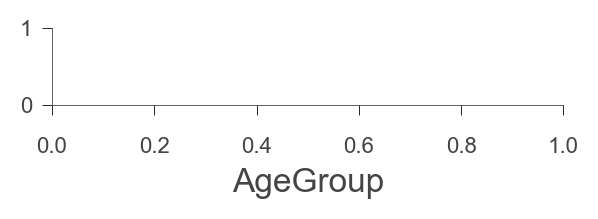

In [39]:
viz_rf.view(scale=1.2)